<a href="https://colab.research.google.com/github/arushnab/bonn-eeg-ml/blob/main/notebooks/week06_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Setups & Imports

In [ ]:
from google.colab import files
import zipfile
import os
import sys

# Upload the dataset
uploaded = files.upload()

with zipfile.ZipFile("bonn-eeg-ml.zip", 'r') as zip_ref:
    zip_ref.extractall()

base_path = "bonn-eeg-ml"
for fname in os.listdir(base_path):
    if fname.endswith(".zip"):
        fpath = os.path.join(base_path, fname)
        extract_to = os.path.join(base_path, fname.replace(".zip", ""))
        with zipfile.ZipFile(fpath, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

Saving bonn-eeg-ml.zip to bonn-eeg-ml (1).zip


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving extract_features.py to extract_features.py
Saving preprocess.py to preprocess (2).py
Saving train_model_w6.py to train_model_w6 (2).py
Saving trainmodel.py to trainmodel (2).py
Saving utils.py to utils (2).py
Saving w4_logreg_zs.pkl to w4_logreg_zs (2).pkl
Saving w4_logreg_zs_Xtest.pkl to w4_logreg_zs_Xtest (2).pkl
Saving w4_logreg_zs_ytest.pkl to w4_logreg_zs_ytest (2).pkl


In [ ]:
import importlib
import extract_features, preprocess, utils
importlib.reload(extract_features)
importlib.reload(preprocess)
importlib.reload(utils)

<module 'utils' from '/content/utils.py'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import shap
from preprocess import load_eeg_folder
from extract_features import (
    extract_bandpowers, extract_advanced_features, extract_all_features
)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


###Load EEG Data & Extract

In [ ]:
import numpy as np
from preprocess import load_eeg_folder
from extract_features import extract_all_features

def build_dataset(z_folder: str, s_folder: str, limit: int = 100, fs: int = 256):
    X, y = [], []
    feature_names = None

    # Z = 0
    for _, sig in load_eeg_folder(z_folder, limit=limit):
        feats, names = extract_all_features(sig, fs=fs)
        if feature_names is None:
            feature_names = names
        X.append(feats); y.append(0)

    # S = 1
    for _, sig in load_eeg_folder(s_folder, limit=limit):
        feats, names = extract_all_features(sig, fs=fs)
        if feature_names is None:
            feature_names = names
        X.append(feats); y.append(1)

    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=int)
    return X, y, feature_names

z_folder = "bonn-eeg-ml/z (2)/z/Z"
s_folder = "bonn-eeg-ml/s/S"

X, y, feature_names = build_dataset(z_folder, s_folder, limit=100, fs=256)
X.shape, feature_names



((200, 11),
 ['delta',
  'theta',
  'alpha',
  'beta',
  'gamma',
  'entropy',
  'line_length',
  'zero_crossings',
  'hjorth_activity',
  'hjorth_mobility',
  'hjorth_complexity'])

###Train Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

###Feature Importance from Random Forest

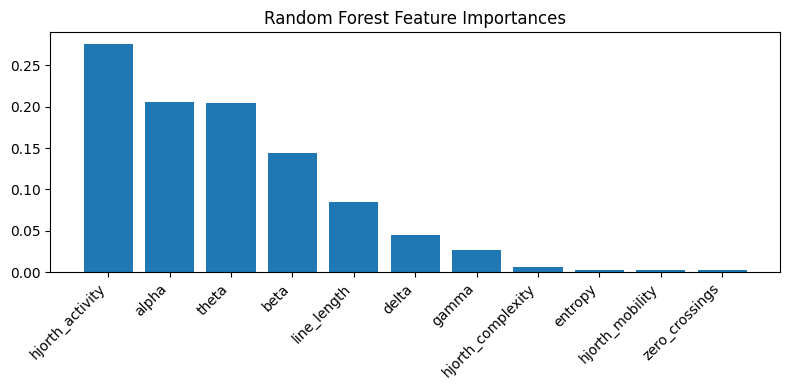

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_
order = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.bar(range(len(importances)), importances[order])
plt.xticks(range(len(importances)), np.array(feature_names)[order], rotation=45, ha='right')
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()



###SHAP Analysis

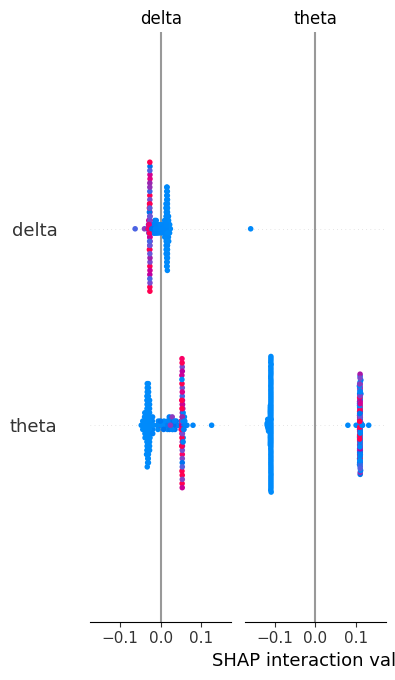

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
sv = explainer.shap_values(X)  # for RF, list per class
sv_pos = sv[1] if isinstance(sv, list) else sv  # positive class shap values
shap.summary_plot(sv_pos, X, feature_names=feature_names, plot_size=(12, 8), show=True)


###Save Outputs

In [ ]:
import os, pickle
os.makedirs("results", exist_ok=True)
with open("results/week6_rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)


Saved -> results/week6_rf_model.pkl
